# PDF to Text - 02 Over-writing software companies

### YOUR ASSIGNMENT
1.	Find three PDF-based datasets,
2.	Convert them to a machine-readable format (txt, csv, etc), and
3.	Do a little something with them.

What is "a little something"?   
•	If you create a text file, clean it up if necessary and extract some information from it. For example, for the custodial_reports  you could have extracted the Report Date and the Agency Number. You can do this work in either Python or a text editor (depending on which is best).  
•	If make a CSV file, clean it up however necessary and ask it a few questions. For example, with the marijuana dataset we could have graphed the change in marijuana arrests over time.  
•	If you extracted right from Python, you should save it in some nice format (a txt file or a csv file)  
The focus of this assignment is generating machine-readable data, so your analysis doesn't have to be very interesting at all.  

SUBMITTING
Create a folder for each dataset on your GitHub repository. This folder should include
1.	The original data
2.	The cleaned data
3.	Any files you used in the process (uzn files, notebooks, etc)
4.	A summary of what you did (see below)

The summary should be a .txt or .md file explaining:  
•	The MuckRock page you got it from  
•	A one-sentence summary of what the data is  
•	A short description of how you processed/cleaned it  

In [1]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
import re
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3
from shapely.geometry import Point, Polygon

### Trying converting the PDF to text
Doesn't work it's an image

In [2]:
!pdf2txt.py ASDC3I_Memo_Destruction_of_Unclassified_DoD_Hard_Drives.pdf -o ASDC3I_Memo_Destruction_of_Unclassified_DoD_Hard_Drives.txt

INFO:pdfminer.pdfdocument:xref found: pos=b'770378'
INFO:pdfminer.pdfdocument:read_xref_from: start=770378, token=/b'xref'
INFO:pdfminer.pdfdocument:xref objects: {77: (None, 770031, 0), 82: (None, 770217, 0), 90: (None, 770316, 0)}
INFO:pdfminer.pdfdocument:trailer: {'Size': 91, 'Info': <PDFObjRef:77>, 'Root': <PDFObjRef:82>, 'Prev': 173, 'ID': [b'd\xd2$\xb0}0H\xb6\xae\x9f\xbe\xd9#\xcc\xe4\x8c', b'Tg}\x980\xf4\xe6Q\xc2\xfa\x9e\\)\xf5\xa2\x15']}
INFO:pdfminer.pdfdocument:read_xref_from: start=173, token=/b'xref'
INFO:pdfminer.pdfdocument:xref objects: {81: (None, 16, 0), 82: (None, 526, 0), 83: (None, 770, 0), 84: (None, 993, 0), 85: (None, 1114, 0), 86: (None, 1134, 0), 87: (None, 1157, 0), 88: (None, 581, 0), 89: (None, 750, 0)}
INFO:pdfminer.pdfdocument:trailer: {'Size': 90, 'Info': <PDFObjRef:77>, 'Root': <PDFObjRef:82>, 'Prev': 768283, 'ID': [b'd\xd2$\xb0}0H\xb6\xae\x9f\xbe\xd9#\xcc\xe4\x8c', b'd\xd2$\xb0}0H\xb6\xae\x9f\xbe\xd9#\xcc\xe4\x8c']}
INFO:pdfminer.pdfdocument:read_xref_f

INFO:root:Processing xobj: <PDFStream(25): raw=39373, {'Type': /'XObject', 'Subtype': /'Image', 'Name': /'Obj28', 'Width': 2550, 'Height': 3300, 'ColorSpace': /'DeviceGray', 'BlackIs1': True, 'BitsPerComponent': 1, 'Length': <PDFObjRef:24>, 'Filter': /'CCITTFaxDecode', 'DecodeParms': {'K': -1, 'Columns': 2550}}>
INFO:root:Page: {'Type': /'Page', 'MediaBox': [0, 0, 612, 792], 'CropBox': [0, 0, 612, 792], 'Parent': <PDFObjRef:78>, 'Rotate': 0, 'Resources': {'ProcSet': [/'PDF', /'ImageC', /'ImageB', /'ImageI'], 'XObject': {'Obj33': <PDFObjRef:30>}}, 'Contents': <PDFObjRef:27>}
INFO:root:Processing page: <PDFPage: Resources={'ProcSet': [/'PDF', /'ImageC', /'ImageB', /'ImageI'], 'XObject': {'Obj33': <PDFObjRef:30>}}, MediaBox=[0, 0, 612, 792]>
INFO:root:render_contents: resources={'ProcSet': [/'PDF', /'ImageC', /'ImageB', /'ImageI'], 'XObject': {'Obj33': <PDFObjRef:30>}}, streams=[<PDFStream(27): raw=48, {'Filter': /'LZWDecode', 'Length': <PDFObjRef:28>}>], ctm=(1, 0, 0, 1, 0, 0)
INFO:root:

INFO:root:Processing xobj: <PDFStream(70): raw=32342, {'Type': /'XObject', 'Subtype': /'Image', 'Name': /'Obj73', 'Width': 2550, 'Height': 3300, 'ColorSpace': /'DeviceGray', 'BlackIs1': True, 'BitsPerComponent': 1, 'Length': <PDFObjRef:69>, 'Filter': /'CCITTFaxDecode', 'DecodeParms': {'K': -1, 'Columns': 2550}}>
INFO:root:Page: {'Type': /'Page', 'MediaBox': [0, 0, 612, 792], 'CropBox': [0, 0, 612, 792], 'Parent': <PDFObjRef:80>, 'Rotate': 0, 'Resources': {'ProcSet': [/'PDF', /'ImageC', /'ImageB', /'ImageI'], 'XObject': {'Obj3': <PDFObjRef:75>}}, 'Contents': <PDFObjRef:72>}
INFO:root:Processing page: <PDFPage: Resources={'ProcSet': [/'PDF', /'ImageC', /'ImageB', /'ImageI'], 'XObject': {'Obj3': <PDFObjRef:75>}}, MediaBox=[0, 0, 612, 792]>
INFO:root:render_contents: resources={'ProcSet': [/'PDF', /'ImageC', /'ImageB', /'ImageI'], 'XObject': {'Obj3': <PDFObjRef:75>}}, streams=[<PDFStream(72): raw=46, {'Filter': /'LZWDecode', 'Length': <PDFObjRef:73>}>], ctm=(1, 0, 0, 1, 0, 0)
INFO:root:Pro

### We got back just a bunch of whitespaces

In [3]:
!cat ASDC3I_Memo_Destruction_of_Unclassified_DoD_Hard_Drives.txt 

### Let's convert it to images with GhostScript, so we can extract text from them
Take notice how I'm converting to images only the pages 8 and 9 where the information I'm looking for is (so we don't waste too much time waiting for process of pages we don't care for)

In [4]:
!gs -dNOPAUSE -dBATCH -dFirstPage=8 -dLastPage=9 -sDEVICE=pdfwrite -sOutputFile=pages8-9.pdf -f ASDC3I_Memo_Destruction_of_Unclassified_DoD_Hard_Drives.pdf

GPL Ghostscript 9.21 (2017-03-16)
Copyright (C) 2017 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
Processing pages 8 through 9.
Page 8
Page 9


### Convert the Pages 8-9 PDF to a 300 dpi PNG image (conversion is made by imagemagick library)

In [5]:
!convert -density 300 pages8-9.pdf -append pages8-9.png

### Optical recognition and conversion to text from tesseract library

In [6]:
!tesseract pages8-9.png pages8-9

Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.


### Let's save the .txt file into this Notebook so we can work with it

In [7]:
pages89 = open('pages8-9.txt').read()
pages89

'with the particular hard disk being sanitized. In addition, some software product versions\nmay not have the capability to remove the OS during the overwriting process. To ensure\nthe integrity of the sanitization process, overwriting software must have the following\nfunctions and capabilities:\n\n2.1.1. The ability to purge all data or information, including the OS, from\nthe physical or virtual drives, thereby making it impossible to recover any\nmeaningful data by keyboard or laboratory attack.\n\n2.1.2. A compatibility with, or capability to run independent of, the OS\nloaded on the hard drive.\n\n2.1.3. A compatibility with, or capability to run independent of, the type of\nhard drive being sanitized (e.g., ATA/IDE or SCSI type hard drives).\n\n2.1.4. A capability to overwrite the entire hard disk drive independent of\nany BIOS or ﬁrmware capacity limitation that the system may have.\n\n2.1.5. A capability to overwrite using a minimum of three cycles (six\npasses) of data patter

In [8]:
split = re.split(r'\n\n', pages89)
split

['with the particular hard disk being sanitized. In addition, some software product versions\nmay not have the capability to remove the OS during the overwriting process. To ensure\nthe integrity of the sanitization process, overwriting software must have the following\nfunctions and capabilities:',
 '2.1.1. The ability to purge all data or information, including the OS, from\nthe physical or virtual drives, thereby making it impossible to recover any\nmeaningful data by keyboard or laboratory attack.',
 '2.1.2. A compatibility with, or capability to run independent of, the OS\nloaded on the hard drive.',
 '2.1.3. A compatibility with, or capability to run independent of, the type of\nhard drive being sanitized (e.g., ATA/IDE or SCSI type hard drives).',
 '2.1.4. A capability to overwrite the entire hard disk drive independent of\nany BIOS or ﬁrmware capacity limitation that the system may have.',
 '2.1.5. A capability to overwrite using a minimum of three cycles (six\npasses) of data 

### List with the information of each software company (address, name, product name, contact details)

In [9]:
softwares = []

for anything in split:
    softwares_dict ={}
    search = re.search(r'^2.2.\d', anything)
    if search:
        lines = anything.split('\n')
        #print(lines)
        for one in lines:
            product = re.search(r'product', one, re.IGNORECASE)
            if product:
                softwares_dict['product'] = one.split(': ')[1]
            softwares_dict['company'] = lines[1]
            softwares_dict['address'] = lines[2]
            tel = re.search(r'tel', one, re.IGNORECASE)
            if tel:
                softwares_dict['tel'] = one.split(': ')[1]
            web = re.search(r'web', one, re.IGNORECASE)
            if web:
                softwares_dict['web'] = one.split(': ')[1]
            support = re.search(r'support', one, re.IGNORECASE)
            if support:
                softwares_dict['technical_support'] = one.split(': ')[1]
        softwares.append(softwares_dict)
    
softwares

[{'address': '14151 Newbrook Drive, Suite 400, Hemdon, VA 20170',
  'company': 'Communication Technologies, Inc.,',
  'product': '"No Trace"',
  'tel': '(703) 961-9080'},
 {'address': '9023 Columbine Road, Eden Prairie, MN 55347',
  'company': 'ONTRACK Data International, Inc.',
  'product': '"DataEraser"',
  'technical_support': '1 (952) 937-2121',
  'tel': '1 (952) 937-5161',
  'web': 'www.ontrack.com'},
 {'address': '1381 Kildaire Farm Road, Suite 415, Cary, NC 27511',
  'company': 'Los Altos Technologies,',
  'product': '"UniShred Pro"',
  'technical_support': '1 (919) 223-9889',
  'tel': '1 (919) 233-9889',
  'web': 'www.lat.com'},
 {'address': '2500 North University Ave., Suite 200, Provo, UT 84604-3 864',
  'company': 'Access Data Corporation',
  'product': '"CleanDrive"',
  'tel': '1 (801) 377-5410'},
 {'address': '6207 Bee Cave Road Austin, TX 78746',
  'company': 'Infraworks',
  'product': '“Sanitizer” D 4.01'}]

## US Department of Defense-'approved' overwriting software companies....

In [10]:
softwares_df = pd.DataFrame(softwares)
softwares_df

,address,company,product,technical_support,tel,web
0,"14151 Newbrook Drive, Suite 400, Hemdon, VA 20170","Communication Technologies, Inc.,","""No Trace""",NaN,(703) 961-9080,NaN
1,"9023 Columbine Road, Eden Prairie, MN 55347","ONTRACK Data International, Inc.","""DataEraser""",1 (952) 937-2121,1 (952) 937-5161,www.ontrack.com
2,"1381 Kildaire Farm Road, Suite 415, Cary, NC 2...","Los Altos Technologies,","""UniShred Pro""",1 (919) 223-9889,1 (919) 233-9889,www.lat.com
3,"2500 North University Ave., Suite 200, Provo, ...",Access Data Corporation,"""CleanDrive""",NaN,1 (801) 377-5410,NaN
4,"6207 Bee Cave Road Austin, TX 78746",Infraworks,“Sanitizer” D 4.01,NaN,NaN,NaN


## ...and where to find them

In [11]:
# Nominatim doesn't return co-ordinates
locs = [ Nominatim().geocode(addr) for addr in softwares_df.address ]
locs

[None, None, None, None, None]

In [13]:
# So let's try with GoogleV3 instead
geolocator = GoogleV3()
softwares_df['long'] = softwares_df.apply(lambda row: geolocator.geocode(row['address']).longitude if geolocator.geocode(row['address']) != None else None, axis=1)
softwares_df['lat'] = softwares_df.apply(lambda row: geolocator.geocode(row['address']).latitude if geolocator.geocode(row['address']) != None else None, axis=1)

softwares_df

,address,company,product,technical_support,tel,web,long,lat
0,"14151 Newbrook Drive, Suite 400, Hemdon, VA 20170","Communication Technologies, Inc.,","""No Trace""",NaN,(703) 961-9080,NaN,NaN,NaN
1,"9023 Columbine Road, Eden Prairie, MN 55347","ONTRACK Data International, Inc.","""DataEraser""",1 (952) 937-2121,1 (952) 937-5161,www.ontrack.com,-93.441480,44.839849
2,"1381 Kildaire Farm Road, Suite 415, Cary, NC 2...","Los Altos Technologies,","""UniShred Pro""",1 (919) 223-9889,1 (919) 233-9889,www.lat.com,-78.783203,35.759172
3,"2500 North University Ave., Suite 200, Provo, ...",Access Data Corporation,"""CleanDrive""",NaN,1 (801) 377-5410,NaN,-111.657368,40.266519
4,"6207 Bee Cave Road Austin, TX 78746",Infraworks,“Sanitizer” D 4.01,NaN,NaN,NaN,-97.830867,30.295679


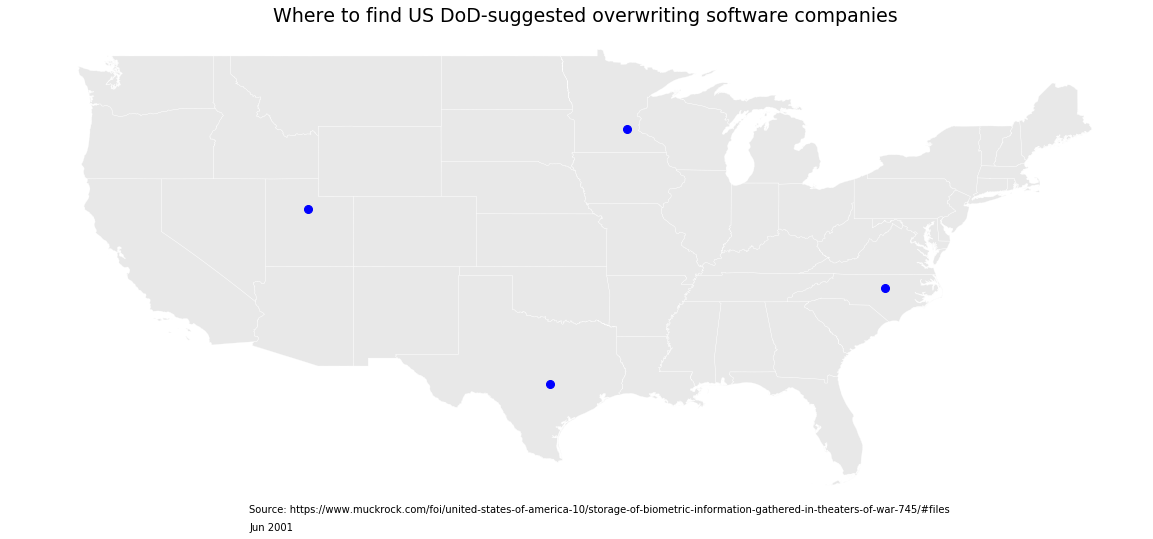

In [15]:
# Building geometry
softwares_df['geometry'] = softwares_df.apply(lambda row: Point(row.long, row.lat), axis=1)
softwares_df = gpd.GeoDataFrame(softwares_df)
softwares_df

# Generating continental states
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')

softwares_df.crs = {'init': 'epsg:4269'}

continental_bounds = [
            [
              -128.671875,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              50.28933925329178
            ],
            [
              -128.671875,
              50.28933925329178
            ],
            [
              -128.671875,
              22.268764039073968
            ]
        ]

continental_box = Polygon(continental_bounds)
continental_states = states[states.within(continental_box)]

# Plotting continental states and the software companies
ax = continental_states.plot(color='lightgrey', figsize=(20,20), edgecolor='white', linewidth=0.25)
softwares_df.plot(ax=ax, color='blue', legend=True, markersize=8)
ax.axis('off')
ax.title.set_text('Where to find US DoD-suggested overwriting software companies')
ax.title.set_color('black')
ax.title.set_fontsize(19)
ax.text(x=-115, y=23, s='Source: https://www.muckrock.com/foi/united-states-of-america-10/storage-of-biometric-information-gathered-in-theaters-of-war-745/#files')
ax.text(x=-115, y=22, s='Jun 2001')